In [36]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet
from scipy.spatial.distance import pdist
import numpy as np

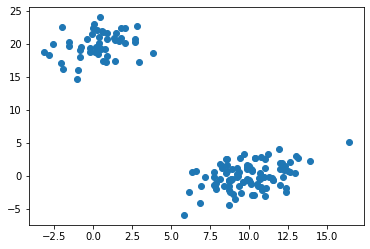

In [37]:
# Генерация класстера из 100 и 50 объектов соответстенно
np.random.seed(4711)
a = np.random.multivariate_normal([10, 0], [[3, 1], [1, 4]], size=[100,])
b = np.random.multivariate_normal([0, 20], [[3, 1], [1, 4]], size=[50,])
X = np.concatenate((a, b),)
X.shape  # Получим матрицу - 150 объектов
plt.scatter(X[: ,0], X[:, 1])
plt.show()

In [42]:
# Генерация матрицы связей (иерархическая класстеризация по сжатой матрице X)
methods = ['single', 'complete', 'average', 'weighted', 'centroid', 'ward']
res = []
for s in methods:
    res.append(linkage(X, s))

In [39]:
c, coph_dists = cophenet(Z, pdist(X)) # Проверка точности расстояний в дейдрограмме между класстерами
print('Точность расстояний: ', c)

Точность расстояний:  0.9800148387574268


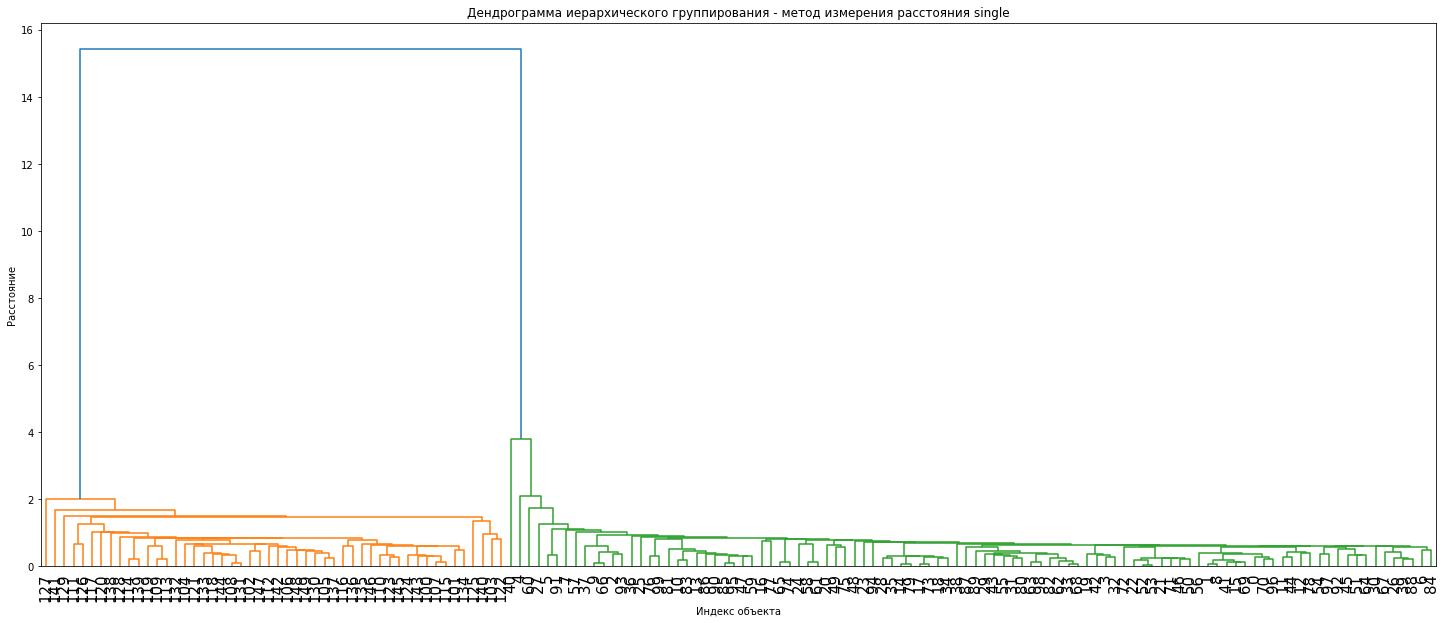

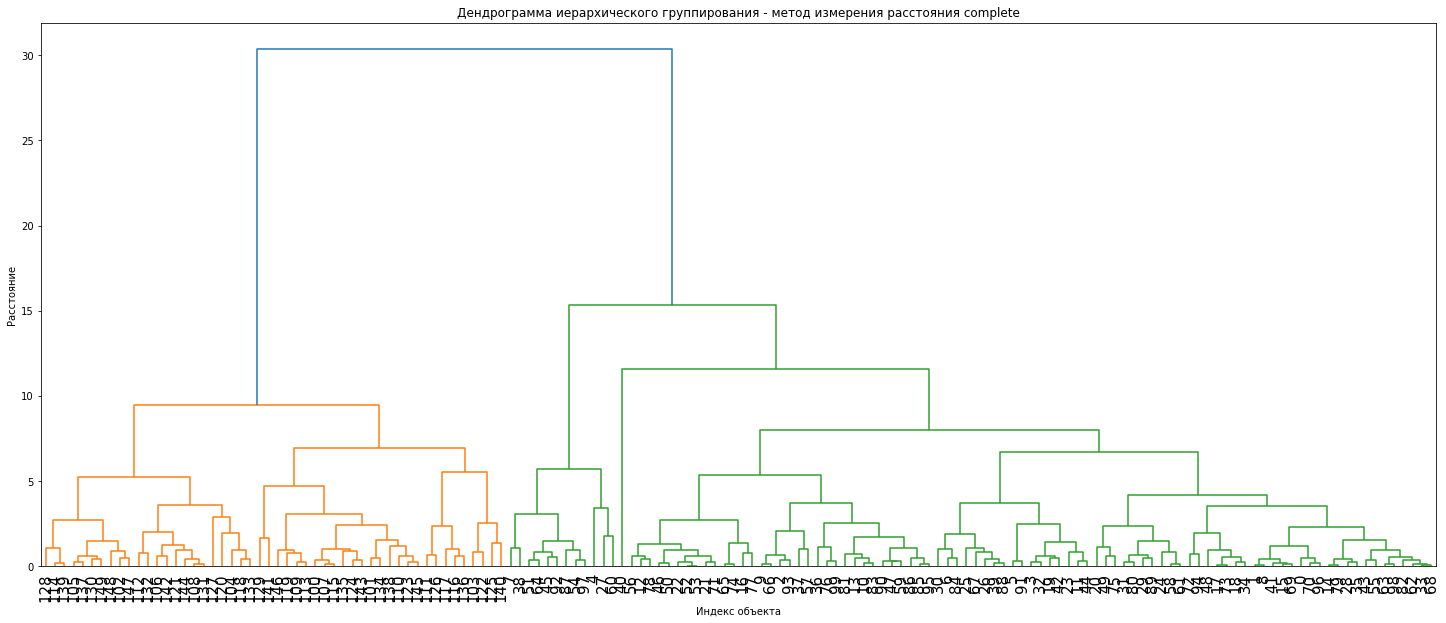

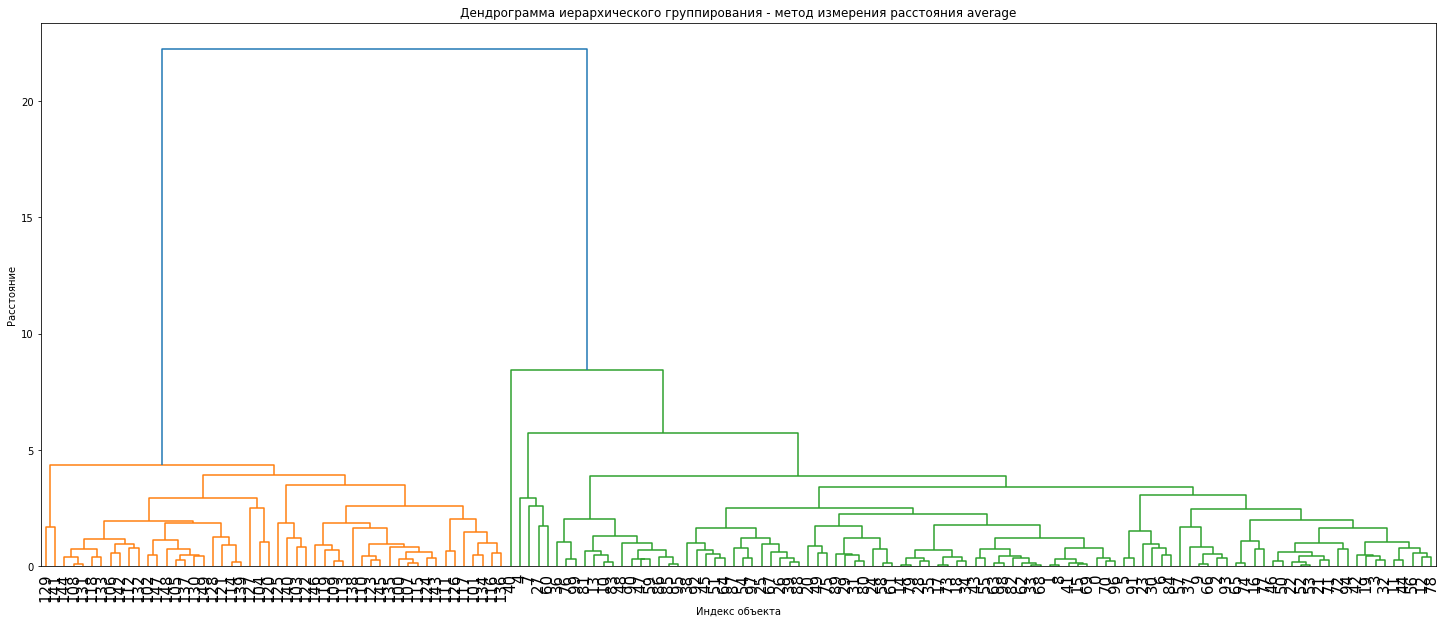

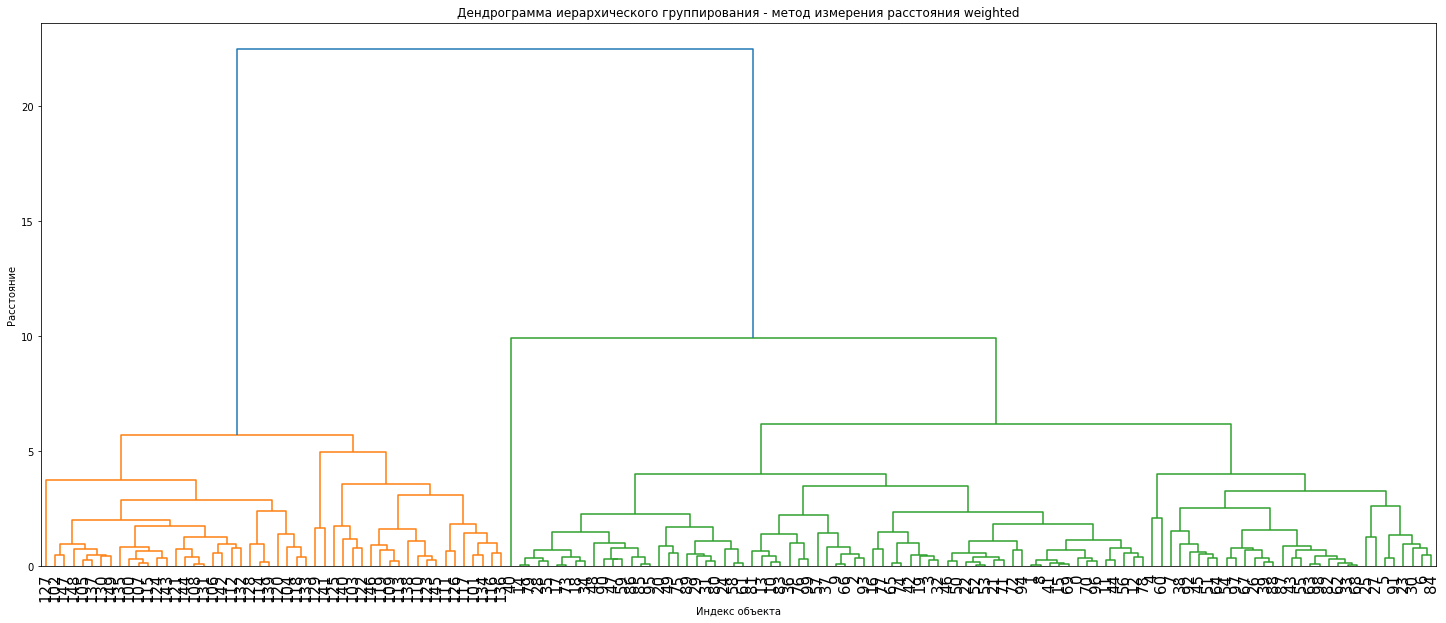

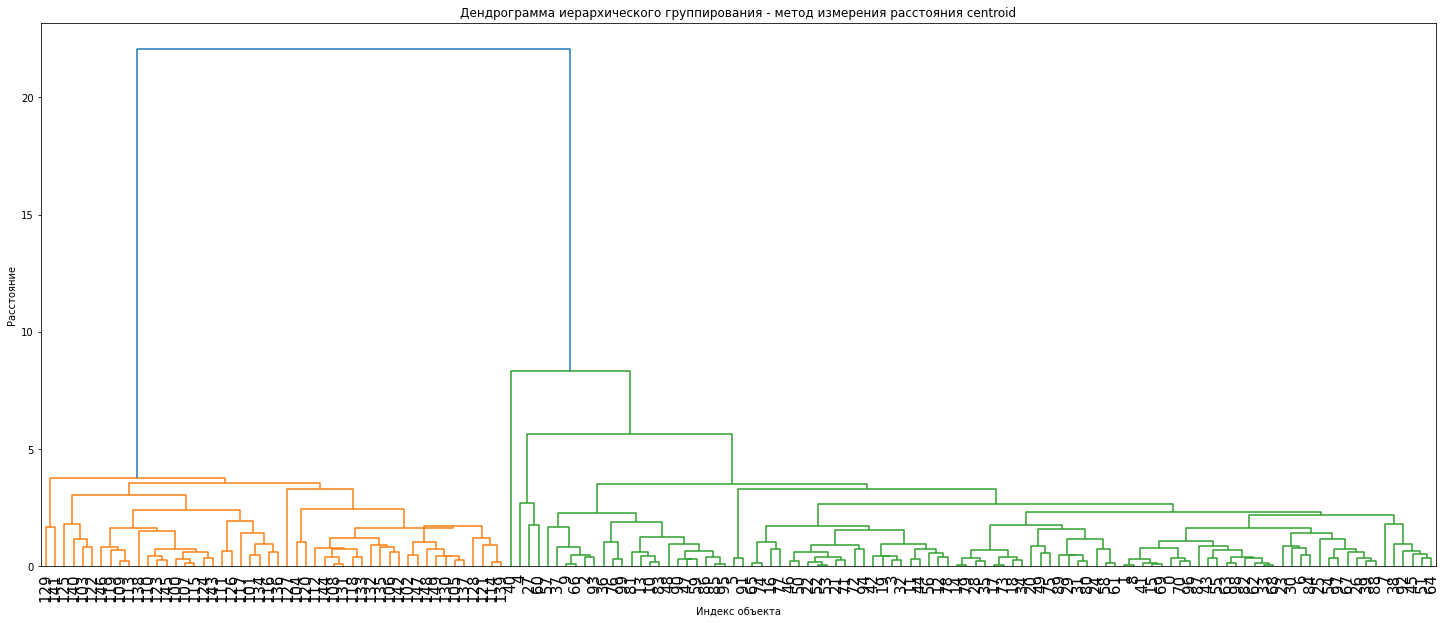

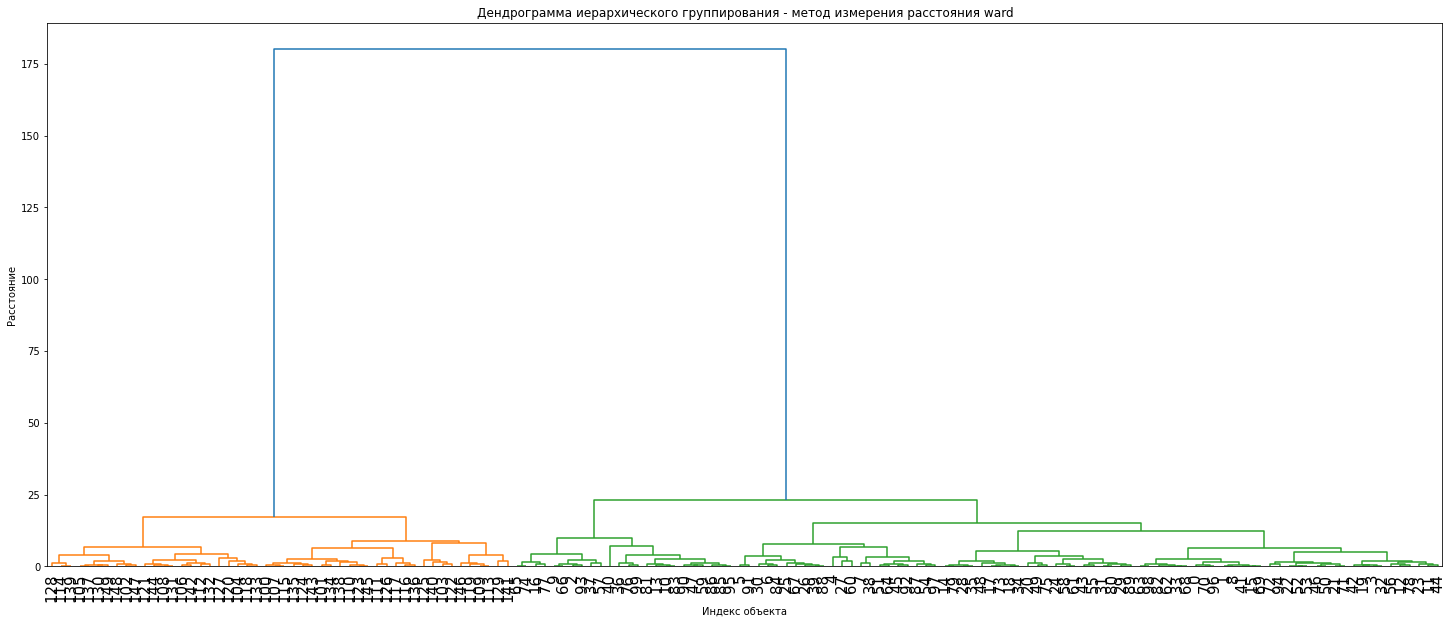

In [45]:
# Подсчет и вывод дендрограммы
for Z, method in zip(res, methods):
    plt.figure(figsize=(25, 10))
    plt.title(f'Дендрограмма иерархического группирования - метод измерения расстояния {method}')
    plt.xlabel('Индекс объекта')
    plt.ylabel('Расстояние')
    dendrogram(
        Z,
        leaf_rotation=90.,
        leaf_font_size=15.,
    )
    plt.show()
